In [1]:
# Installing nilearn
!pip install nilearn

In [2]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [3]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_dosenbach160'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

C:\Users\rohit\anaconda3\Lib\site-packages\nilearn\datasets\func.py:1201: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [4]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_dosenbach160'])

C:\Users\rohit\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
C:\Users\rohit\anaconda3\Lib\site-packages\nilearn\connectome\connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
C:\Users\rohit\anaconda3

In [5]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [6]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [8]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [9]:
from sklearn.model_selection import cross_validate

In [10]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
n_neighbors = list(range(1, 51))

In [11]:
# First, we go with Manhattan distance (p = 1)

acc = []
K = []
for k in range(1, 51):
    K.append(k)
    clf = KNN(n_neighbors=k, p=1)
    cv_results = cross_validate(clf, X, y, cv=5)
    score = np.mean(cv_results['test_score'])
    acc.append(score)

In [12]:
# First, we go with Euclidean distance (p = 2)

acc_ = []
K_ = []
for k in range(1, 51):
    K_.append(k)
    clf = KNN(n_neighbors=k, p=2)
    cv_results = cross_validate(clf, X, y, cv=5)
    score = np.mean(cv_results['test_score'])
    acc_.append(score)


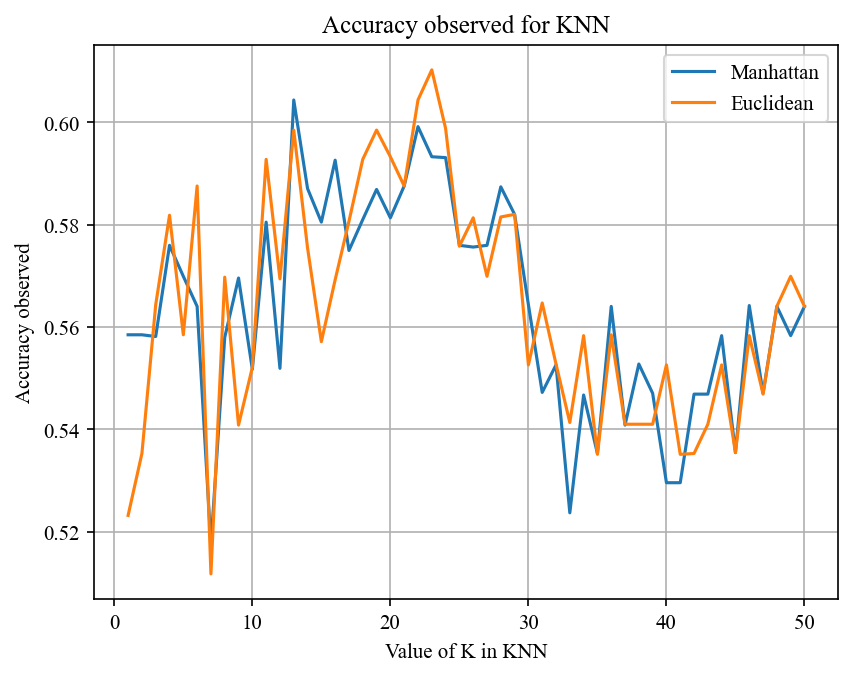

In [13]:
# Visualizing the results obtained
plt.figure(dpi =150 )
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy observed')
plt.grid()
plt.plot(K, acc, label='Manhattan')
plt.plot(K_, acc_, label='Euclidean')
plt.title('Accuracy observed for KNN')
plt.legend()
plt.show()

In [14]:
acc.sort()
acc[-1]

0.6043697478991598

In [15]:
acc_.sort()
acc_[-1]

0.6102521008403362